<a href="https://colab.research.google.com/github/sashakorovkina123/disneyland/blob/main/disneyland_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [ ]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#Upload Data

In [ ]:
! kaggle datasets download arushchillar/disneyland-reviews

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip disneyland-reviews

unzip:  cannot find or open disneyland-reviews, disneyland-reviews.zip or disneyland-reviews.ZIP.


#Make the Test and Train Datasets

The test dataset is unlabelled

In [ ]:
df = pd.read_csv('DisneylandReviews.csv', encoding='latin-1')

In [ ]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [ ]:
#for now I shall attempt to disregard the BRANCH and assume that all of the reviews describe the same branch

test = df.drop(['Year_Month', 'Rating', 'Reviewer_Location', 'Branch'], axis=1)


In [ ]:
test.head()

,Review_ID,Review_Text
0,670772142,If you've ever been to Disneyland anywhere you...
1,670682799,Its been a while since d last time we visit HK...
2,670623270,Thanks God it wasn t too hot or too humid wh...
3,670607911,HK Disneyland is a great compact park. Unfortu...
4,670607296,"the location is not in the city, took around 1..."


#Issue 1 - Labelling the Train Dataset

I ran into the issue of the training dataset not having reference values (1s for positive sentiment and 0s for the negative sentiment). I will resolve this issue by doing the following:
1. Keeping the 'rating column'
2. Saying that all ratings above a certain value are positive and hance must have a positive sentiment
3. Replace the ratings with 1s and 0s
4. Re-label the names of the columns

In [ ]:
train = pd.read_csv('DisneylandReviews.csv', encoding='latin-1')

In [ ]:
train['Rating'].unique()

array([4, 3, 5, 2, 1])

In [ ]:
#replacing the values
train.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [ ]:
#convert all values in a column to int
df["Rating"] = pd.to_numeric(df["Rating"])

In [ ]:
df1 = df.replace(1, 0, regex = True)
df2 = df1.replace(2, 0, regex = True)
df3 = df2.replace(3, 0, regex = True)
df4 = df3.replace(4, 1, regex = True)
df5 = df4.replace(5, 1, regex = True)

In [ ]:
#re-name the columns
df5.rename(columns={'Rating': 'label', 'Review_ID': 'id' }).head(2)

,id,label,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,1,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,1,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong


In [ ]:
train = df5.drop(['Year_Month', 'Reviewer_Location', 'Branch'], axis=1)

In [ ]:
train.head(10)

,Review_ID,Rating,Review_Text
0,670772142,1,If you've ever been to Disneyland anywhere you...
1,670682799,1,Its been a while since d last time we visit HK...
2,670623270,1,Thanks God it wasn t too hot or too humid wh...
3,670607911,1,HK Disneyland is a great compact park. Unfortu...
4,670607296,1,"the location is not in the city, took around 1..."
5,670591897,0,"Have been to Disney World, Disneyland Anaheim ..."
6,670585330,1,Great place! Your day will go by and you won't...
7,670574142,0,Think of it as an intro to Disney magic for th...
8,670571027,0,"Feel so let down with this place,the Disneylan..."
9,670570869,1,I can go on talking about Disneyland. Whatever...


In [ ]:
train.rename(columns={'Rating': 'label', 'Review_ID': 'id', 'Review_Text': 'review' }).head(30)

,id,label,review
0,670772142,1,If you've ever been to Disneyland anywhere you...
1,670682799,1,Its been a while since d last time we visit HK...
2,670623270,1,Thanks God it wasn t too hot or too humid wh...
3,670607911,1,HK Disneyland is a great compact park. Unfortu...
4,670607296,1,"the location is not in the city, took around 1..."
5,670591897,0,"Have been to Disney World, Disneyland Anaheim ..."
6,670585330,1,Great place! Your day will go by and you won't...
7,670574142,0,Think of it as an intro to Disney magic for th...
8,670571027,0,"Feel so let down with this place,the Disneylan..."
9,670570869,1,I can go on talking about Disneyland. Whatever...


#Step 1

Combining the train and test dataset

In [ ]:
combine = train.append(test,ignore_index=True,sort=True)

In [ ]:
combine.head()

,Rating,Review_ID,Review_Text
0,1.0,670772142,If you've ever been to Disneyland anywhere you...
1,1.0,670682799,Its been a while since d last time we visit HK...
2,1.0,670623270,Thanks God it wasn t too hot or too humid wh...
3,1.0,670607911,HK Disneyland is a great compact park. Unfortu...
4,1.0,670607296,"the location is not in the city, took around 1..."


In [ ]:
combine.tail()

,Rating,Review_ID,Review_Text
85307,NaN,1765031,i went to disneyland paris in july 03 and thou...
85308,NaN,1659553,2 adults and 1 child of 11 visited Disneyland ...
85309,NaN,1645894,My eleven year old daughter and myself went to...
85310,NaN,1618637,"This hotel, part of the Disneyland Paris compl..."
85311,NaN,1536786,"I went to the Disneyparis resort, in 1996, wit..."


#Step 2

Removing Punctuation, Numbers, and Special Characters 

In [ ]:
combine['tidy_review'] = combine['Review_Text'].str.replace("[^a-zA-Z#]", " ")

combine.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Rating,Review_ID,Review_Text,tidy_review
0,1.0,670772142,If you've ever been to Disneyland anywhere you...,If you ve ever been to Disneyland anywhere you...
1,1.0,670682799,Its been a while since d last time we visit HK...,Its been a while since d last time we visit HK...
2,1.0,670623270,Thanks God it wasn t too hot or too humid wh...,Thanks God it wasn t too hot or too humid wh...
3,1.0,670607911,HK Disneyland is a great compact park. Unfortu...,HK Disneyland is a great compact park Unfortu...
4,1.0,670607296,"the location is not in the city, took around 1...",the location is not in the city took around ...
5,0.0,670591897,"Have been to Disney World, Disneyland Anaheim ...",Have been to Disney World Disneyland Anaheim ...
6,1.0,670585330,Great place! Your day will go by and you won't...,Great place Your day will go by and you won t...
7,0.0,670574142,Think of it as an intro to Disney magic for th...,Think of it as an intro to Disney magic for th...
8,0.0,670571027,"Feel so let down with this place,the Disneylan...",Feel so let down with this place the Disneylan...
9,1.0,670570869,I can go on talking about Disneyland. Whatever...,I can go on talking about Disneyland Whatever...


#Step 3 
Removing short words

In [ ]:
combine['tidy_review'] = combine['tidy_review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,Rating,Review_ID,Review_Text,tidy_review
0,1.0,670772142,If you've ever been to Disneyland anywhere you...,ever been Disneyland anywhere find Disneyland ...
1,1.0,670682799,Its been a while since d last time we visit HK...,been while since last time visit Disneyland th...
2,1.0,670623270,Thanks God it wasn t too hot or too humid wh...,Thanks wasn humid when visiting park otherwise...
3,1.0,670607911,HK Disneyland is a great compact park. Unfortu...,Disneyland great compact park Unfortunately th...
4,1.0,670607296,"the location is not in the city, took around 1...",location city took around hour from Kowlon kid...
5,0.0,670591897,"Have been to Disney World, Disneyland Anaheim ...",Have been Disney World Disneyland Anaheim Toky...
6,1.0,670585330,Great place! Your day will go by and you won't...,Great place Your will even know Obviously went...
7,0.0,670574142,Think of it as an intro to Disney magic for th...,Think intro Disney magic little ones Almost at...
8,0.0,670571027,"Feel so let down with this place,the Disneylan...",Feel down with this place Disneyland train fan...
9,1.0,670570869,I can go on talking about Disneyland. Whatever...,talking about Disneyland Whatever about less D...


#Step 4 - Tokenization

 Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [ ]:
tokenized_review = combine['tidy_review'].apply(lambda x: x.split())

tokenized_review.head()

0    [ever, been, Disneyland, anywhere, find, Disne...
1    [been, while, since, last, time, visit, Disney...
2    [Thanks, wasn, humid, when, visiting, park, ot...
3    [Disneyland, great, compact, park, Unfortunate...
4    [location, city, took, around, hour, from, Kow...
Name: tidy_review, dtype: object

#Step 5 - Stemming

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.

In [ ]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_review = tokenized_review.apply(lambda x: [ps.stem(i) for i in x])

tokenized_review.head()

0    [ever, been, disneyland, anywher, find, disney...
1    [been, while, sinc, last, time, visit, disneyl...
2    [thank, wasn, humid, when, visit, park, otherw...
3    [disneyland, great, compact, park, unfortun, t...
4    [locat, citi, took, around, hour, from, kowlon...
Name: tidy_review, dtype: object

In [ ]:
for i in range(len(tokenized_review)):
    tokenized_review[i] = ' '.join(tokenized_review[i])

combine['tidy_review'] = tokenized_review
combine.head()

,Rating,Review_ID,Review_Text,tidy_review
0,1.0,670772142,If you've ever been to Disneyland anywhere you...,ever been disneyland anywher find disneyland h...
1,1.0,670682799,Its been a while since d last time we visit HK...,been while sinc last time visit disneyland thi...
2,1.0,670623270,Thanks God it wasn t too hot or too humid wh...,thank wasn humid when visit park otherwis woul...
3,1.0,670607911,HK Disneyland is a great compact park. Unfortu...,disneyland great compact park unfortun there q...
4,1.0,670607296,"the location is not in the city, took around 1...",locat citi took around hour from kowlon kid li...


#Data Visualization

In [ ]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [ ]:
df = pd.read_csv('DisneylandReviews.csv', encoding='latin-1')
all_reviews_negative = ' '.join(text for text in test['Review_Text'][test['Rating'] < 3])

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('https://media.istockphoto.com/vectors/heart-broken-symbol-vector-id898376288?k=20&m=898376288&s=612x612&w=0&h=BKtkGKO5F1jIdT8PfbLwOqsDrUBr8rautq3fX4DpWGQ=', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_reviews_negative)

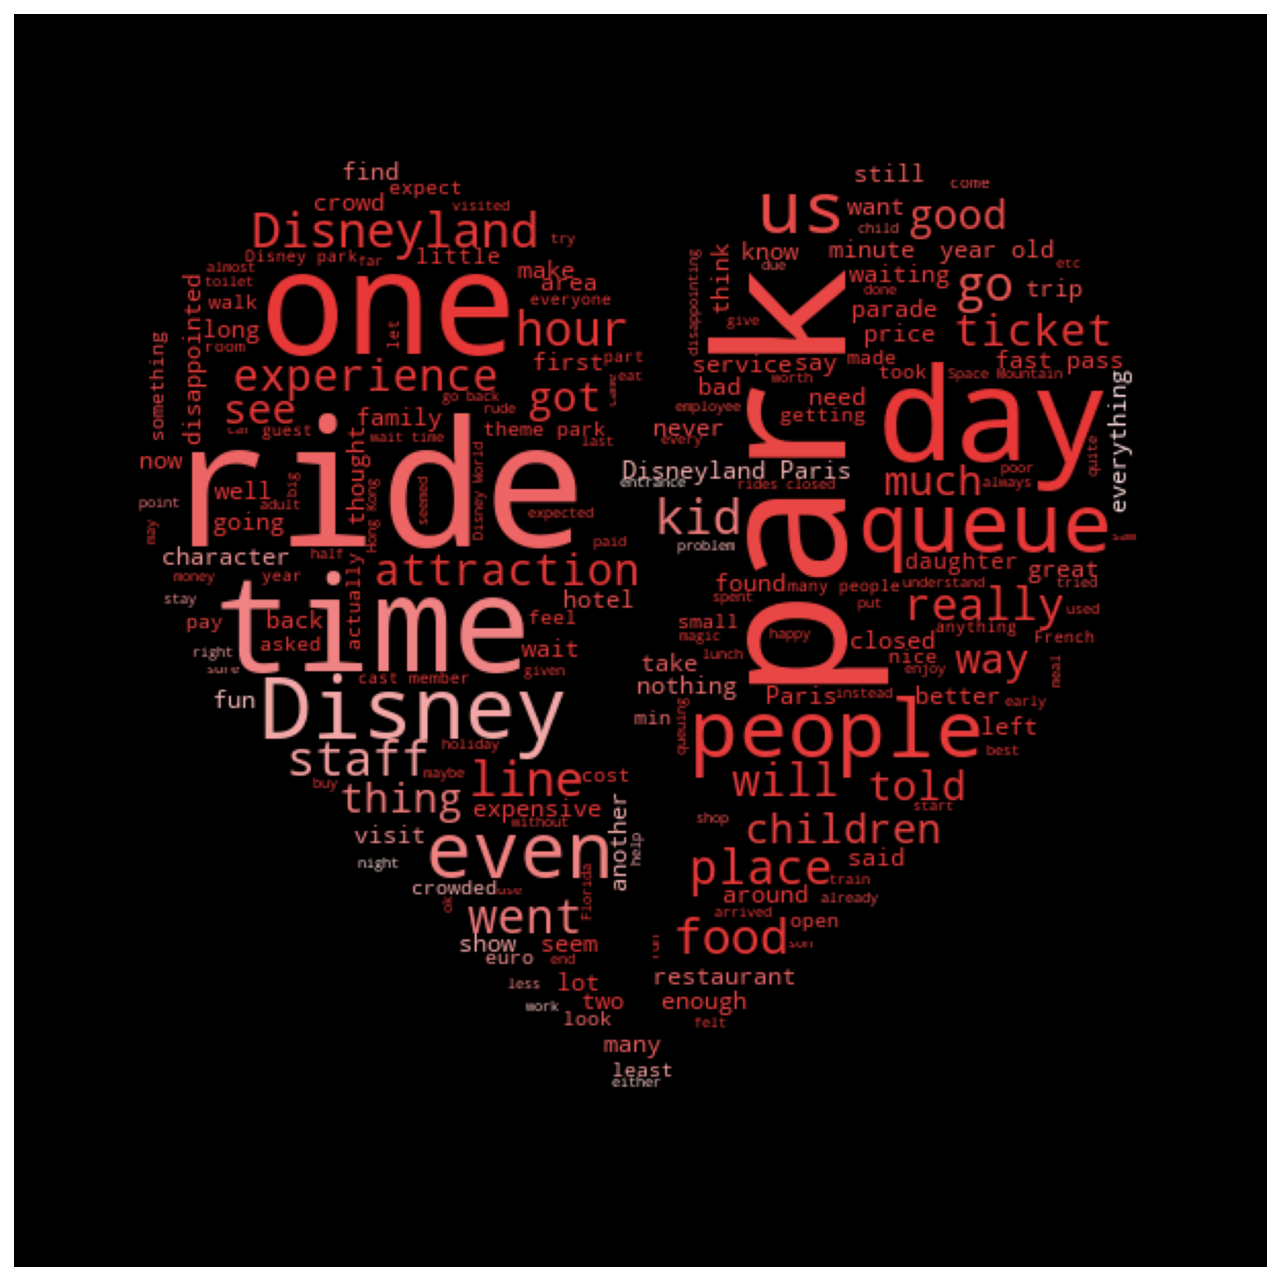

In [ ]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

#Bag of Words Approach

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['tidy_review'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
85308,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
85310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.model_selection import train_test_split

x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['Rating'],test_size=0.3,random_state=2)

#Applying Machine Learning Models

In [ ]:
train_bow = bow[:42656]

train_bow.todense()

matrix([[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

#Applying a Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

#Applying the Bag of Words Model

In [43]:
# Fitting the Logistic Regression Model

Log_Reg.fit(x_train_bow,y_train_bow)

# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[0.01378467, 0.98621533],
       [0.20027144, 0.79972856],
       [0.14203484, 0.85796516],
       ...,
       [0.17871305, 0.82128695],
       [0.0037206 , 0.9962794 ],
       [0.61508535, 0.38491465]])

#Calculate F1 Score

In [44]:
from sklearn.metrics import f1_score

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

prediction_int = prediction_int.astype(int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.9172350230414746

#Using this Model to Predict Test Data

In [45]:
test = pd.read_csv('DisneylandReviews.csv', encoding='latin-1')
test.head(3)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong


In [48]:
test_bow = bow[42656:]

test_pred = Log_Reg.predict_proba(test_bow)

test_pred_int = test_pred[:,1] >= 0.8

test_pred_int = test_pred_int.astype(int)

test['Rating'] = test_pred_int

submission = test[['Rating', 'Branch','Review_Text']]

submission.to_csv('result.csv', index=False)

In [49]:
res = pd.read_csv('result.csv')

res.head(100)

,Rating,Branch,Review_Text
0,1,Disneyland_HongKong,If you've ever been to Disneyland anywhere you...
1,0,Disneyland_HongKong,Its been a while since d last time we visit HK...
2,1,Disneyland_HongKong,Thanks God it wasn t too hot or too humid wh...
3,0,Disneyland_HongKong,HK Disneyland is a great compact park. Unfortu...
4,1,Disneyland_HongKong,"the location is not in the city, took around 1..."
...,...,...,...
95,1,Disneyland_HongKong,Fantastic Nice place and kids friendly Easly...
96,1,Disneyland_HongKong,What is there not to love about Disneyland? Th...
97,1,Disneyland_HongKong,Friendly staff and cooling weather! Used Klook...
98,0,Disneyland_HongKong,Smallest Disneyland and spent a day here. Havi...


#Figuring out the Reviews for Each Branch

In [50]:
total_paris = int(res.loc[res['Branch'].isin(['Disneyland_Paris']), 'Rating'].sum())/13630
print(total_paris)

0.6225972120322817


In [51]:
total_hongkong = int(res.loc[res['Branch'].isin(['Disneyland_HongKong']), 'Rating'].sum())/9620
print(total_hongkong)

0.712993762993763


In [52]:
total_california = int(res.loc[res['Branch'].isin(['Disneyland_California']), 'Rating'].sum())/19406
print(total_california)

0.7646088838503555
